In [1]:
from dmft import DMFT
import tight_binding as TB
import solvers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
tb = TB.Tight_binding()
tb.read_file('./test_data/cubic.txt')
tb.make_k_points((61,61,61))
# ek = tb.dispersion()

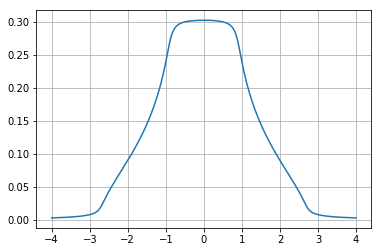

In [3]:
omega = np.linspace(-4,4,1000)
tb.DOS(omega,mu = 0.0, etta = 0.1, sigma = 0)
plt.plot(omega,tb.dos)
plt.grid()

In [4]:
beta = 10.0
num_iw = 128
mu = 0.0
alpha = 1.0
n_loops = 5
tol = 0.0001
wn = np.pi * (2 * np.array(range(-int(num_iw / 2), num_iw // 2)) + 1) / beta

In [5]:
gf_initial = tb.gf_iwn(wn, mu)

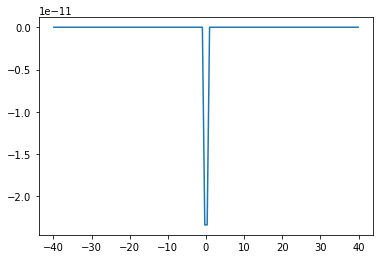

In [6]:
plt.plot(wn,gf_initial.real)

### QMC

In [7]:
U = 6.0
num = 10
g = 0.35
y = 2 * g**2 /0.07

In [8]:
solver = solvers.QMC_CT_INT(beta=beta, U = U, num=10 , g0=gf_initial, num_iw=num_iw, steps= 1 * 10**4, 
                            p=1.0, delta=0.51, y = y, w0 = 0.07, pu=0.5,
                           mu=0.0)

In [9]:
dmft1 = DMFT(n_loops, gf_initial, solver, alpha, tol, tb_model=tb)

In [10]:
dmft1.body()

DMFT Loop : 0 / 5 starts at 2020-01-31 15:25:25.129371


Simulation:   0%|          | 0/10000 [00:00<?, ?it/s]

DMFT Loop : 1 / 5 starts at 2020-01-31 15:25:35.866767


Thermo:  57%|█████▋    | 571/1000 [00:00<00:00, 5688.33it/s]

DMFT Loop : 2 / 5 starts at 2020-01-31 15:25:38.887889


Thermo:  54%|█████▍    | 540/1000 [00:00<00:00, 5397.35it/s]

DMFT Loop : 3 / 5 starts at 2020-01-31 15:25:41.955528


Simulation:   0%|          | 0/10000 [00:00<?, ?it/s]

DMFT Loop : 4 / 5 starts at 2020-01-31 15:25:44.972330


Simulation: 100%|██████████| 10000/10000 [00:02<00:00, 3655.91it/s]

DMFT Loop : 5 / 5 ends at 2020-01-31 15:25:47.890717


In [11]:
dmft1.solver.sign

1.0

In [12]:
last_step_qmc = dmft1.g_list.shape[0]
gf_qmc = np.copy(dmft1.g_list)

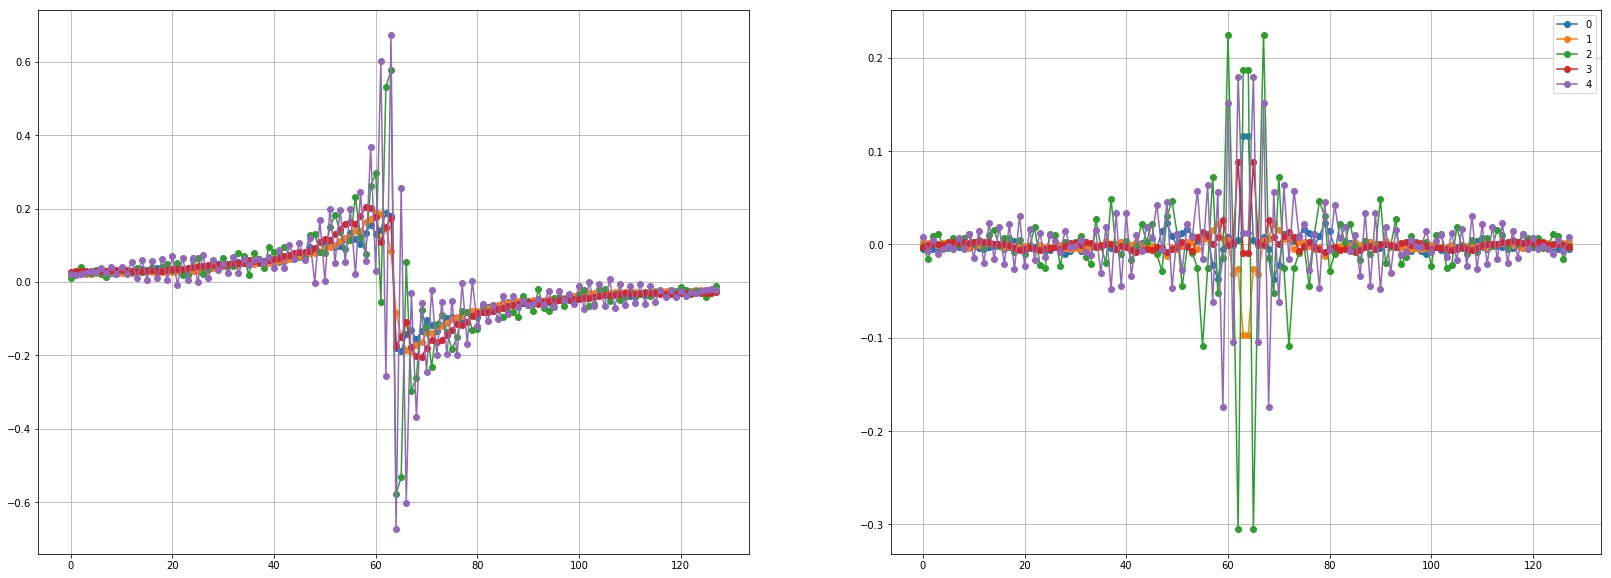

In [13]:
plt.figure(figsize=(28,10))
for i in range(last_step_qmc):
    plt.subplot(121)
    plt.grid()
    plt.plot(gf_qmc[i].imag,'-o', label = i)
    plt.subplot(122)
    plt.grid()
    plt.plot(gf_qmc[i].real,'-o', label = i)
plt.legend()

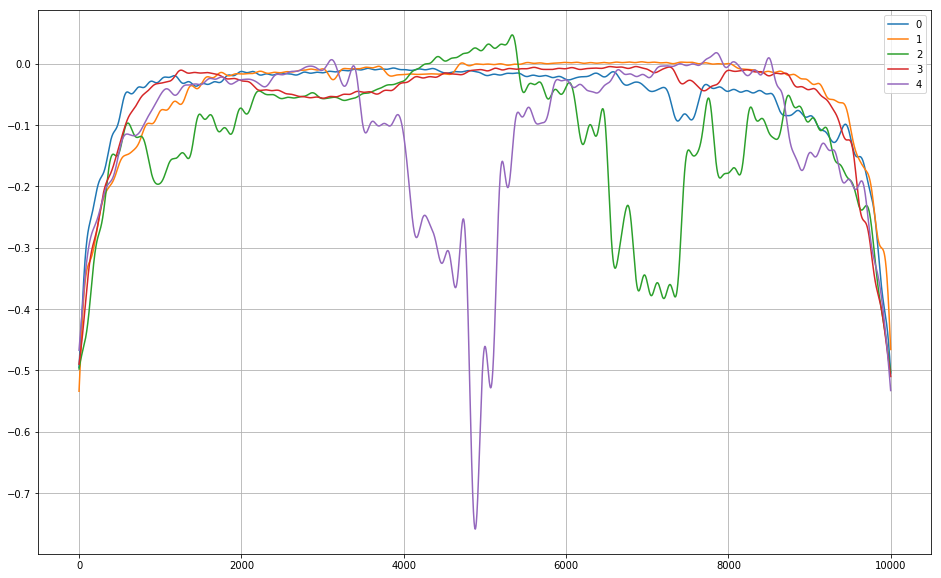

In [14]:
import fft
plt.figure(figsize=(16,10))
for i in range(last_step_qmc):
    plt.plot(fft.inverse_fourier(beta, gf_qmc[i], 10000), label = i)
plt.grid()
plt.legend()

## ED

In [15]:
gf_initial = tb.gf_iwn(wn, mu = 3.0)

In [16]:
betaEmax = 10.
minImpact = 0.001
solver = solvers.ED(beta, wn, betaEmax, minImpact, full = True, 
                    mc = 3,
                    mu = 3.0,
                    n_max = 1,
                    Ud = 6.0, 
                    Vcd = 0,
                    ec = 0,
                    gamma_bd = 0.35, 
                    eb = 0.07, 
                    delta = 1.0, calc = False)

In [17]:
dmft = DMFT(n_loops, gf_initial, solver, alpha, tol, tb_model=tb)

dmft.body()

DMFT Loop : 0 / 5 starts at 2020-01-31 15:26:32.718650
DMFT Loop : 1 / 5 starts at 2020-01-31 15:29:45.973942
DMFT Loop : 2 / 5 starts at 2020-01-31 15:32:50.903975
DMFT Loop : 3 / 5 starts at 2020-01-31 15:35:57.423723
DMFT Loop : 4 / 5 starts at 2020-01-31 15:39:04.720040
DMFT Loop : 5 / 5 ends at 2020-01-31 15:42:14.008173


In [18]:
last_step_ed = dmft.g_list.shape[0]
gf_ed = np.copy(dmft.g_list)

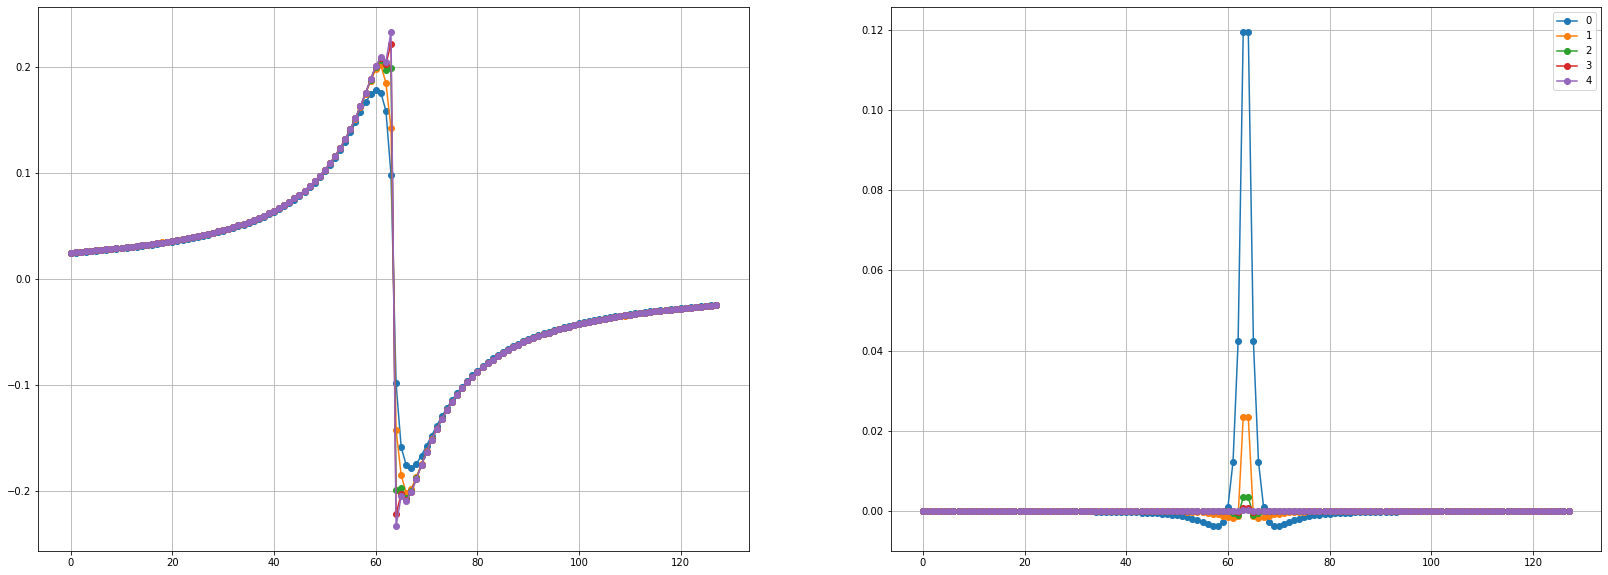

In [19]:
plt.figure(figsize=(28,10))
for i in range(last_step_ed):
    plt.subplot(121)
    plt.grid()
    plt.plot(gf_ed[i].imag,'-o', label = i)
    plt.subplot(122)
    plt.grid()
    plt.plot(gf_ed[i].real,'-o', label = i)
plt.legend()

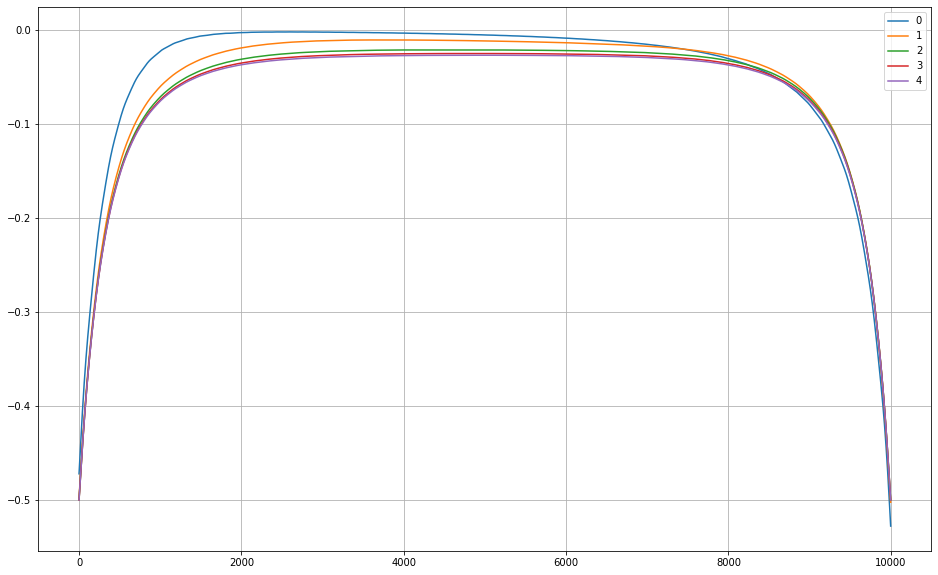

In [20]:
import fft
plt.figure(figsize=(16,10))
for i in range(last_step_ed):
    plt.plot(fft.inverse_fourier(beta, gf_ed[i], 10000), label = i)
plt.grid()
plt.legend()

## QMC vs ED

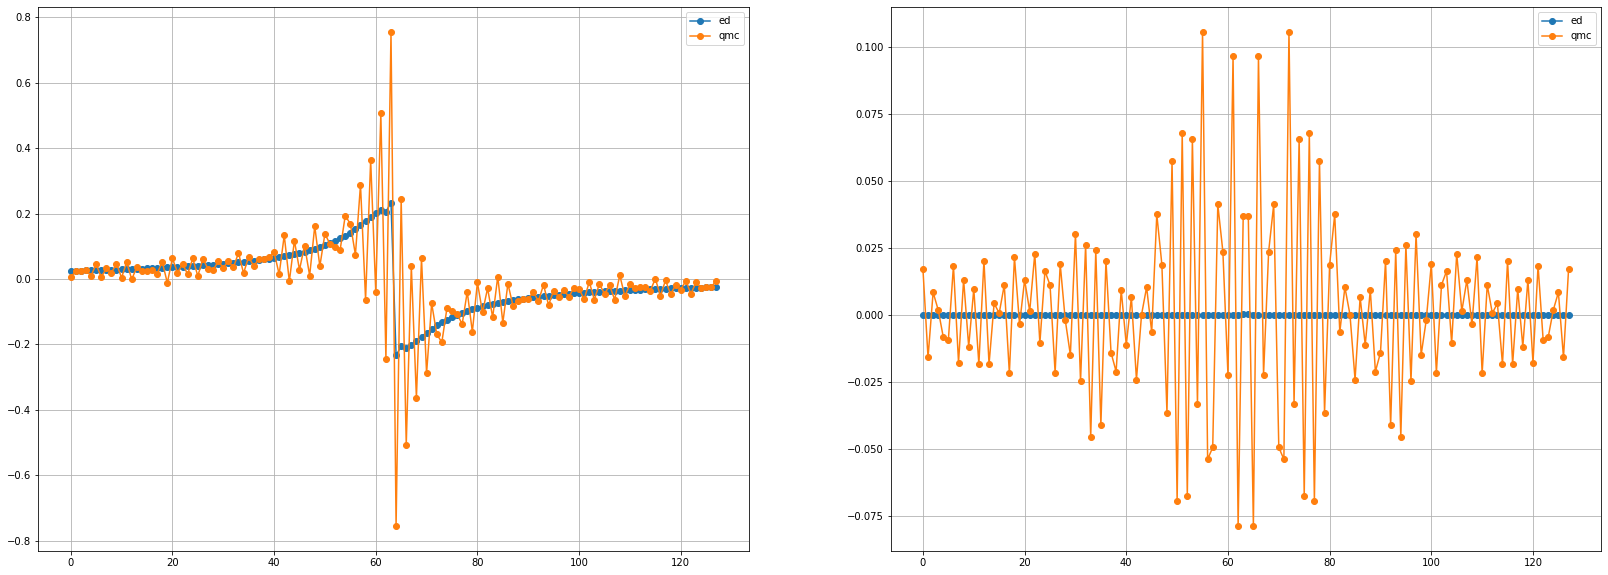

In [21]:
plt.figure(figsize=(28,10))
for i, part in zip([1, 2], ['imag', 'real']):
    plt.subplot(1, 2, i)
    plt.grid()
    eval("plt.plot(gf_ed[last_step_ed -1].{},'-o', label = 'ed')".format(part))
    eval("plt.plot(gf_qmc[last_step_qmc - 1].{},'-o', label = 'qmc')".format(part))
    plt.legend()

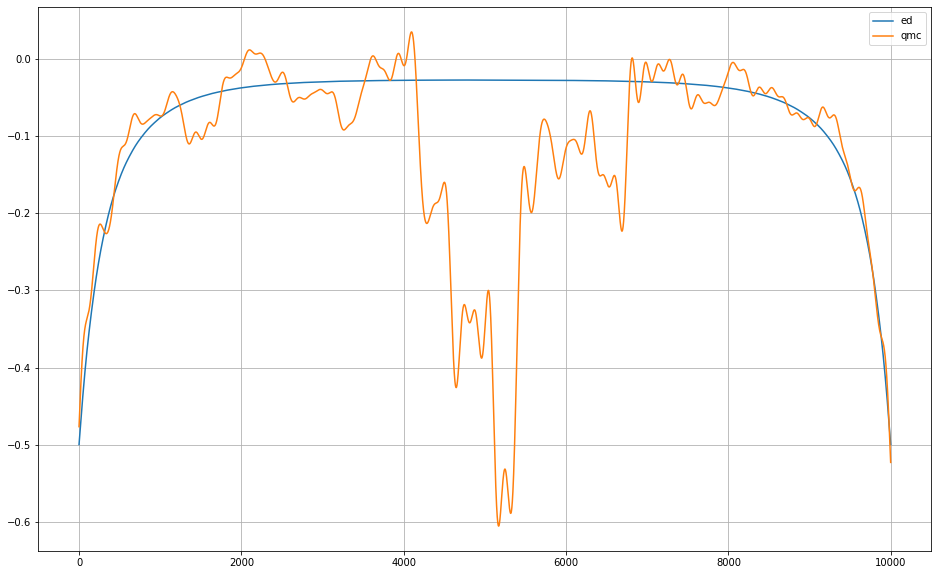

In [22]:
plt.figure(figsize=(16,10))
plt.grid()
plt.plot(fft.inverse_fourier(beta,gf_ed[last_step_ed - 1], 10000), label = 'ed')
plt.plot(fft.inverse_fourier(beta,gf_qmc[last_step_qmc - 1], 10000), label = 'qmc')
plt.legend()

In [1]:
import os


In [13]:
[i for i in os.listdir('src/') if i[-3:] == '.py']

['qmc_tools.py',
 'fft.py',
 '__init__.py',
 'impurity_green_function.py',
 'solvers.py',
 'anderson_model.py',
 'basis.py',
 'fit.py',
 'dmft.py',
 'tight_binding.py',
 'ed_tools.py',
 'truncation_hilbert_space.py']

In [3]:
import setuptools

In [10]:
setuptools.find_packages(include=('src/qmc_tools.py',
 'src/fft.py',
 'src/__init__.py',
 'src/impurity_green_function.py',
 'src/solvers.py',
 'src/anderson_model.py',
 'src/basis.py',
 'src/fit.py',
 'src/dmft.py',
 'src/tight_binding.py',
 'src/ed_tools.py',
 'src/truncation_hilbert_space.py',))

[]

In [ ]:
setuptools.setup()

In [15]:
setuptools.find_packages()

['src']

In [18]:
setuptools.find_packages(include=([])),
,

In [19]:
package_data


({'': ['test_data/']},)